In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
train_data=pd.read_csv("fraudTrain.csv")
train_data.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


In [4]:
test_data=pd.read_csv("fraudTest.csv")
test_data.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0


In [5]:
train_data['trans_date_trans_time'] = pd.to_datetime(train_data['trans_date_trans_time'])
train_data['first'] = train_data['first'].astype(str)
train_data['last'] = train_data['last'].astype(str)
train_data['gender'] = train_data['gender'].astype(str)
train_data['street'] = train_data['street'].astype(str)
train_data['city'] = train_data['city'].astype(str)
train_data['state'] = train_data['state'].astype(str)

Fraudulent transactions: 7506 (0.58%)
Legitimate transactions: 1289169 (99.42%)


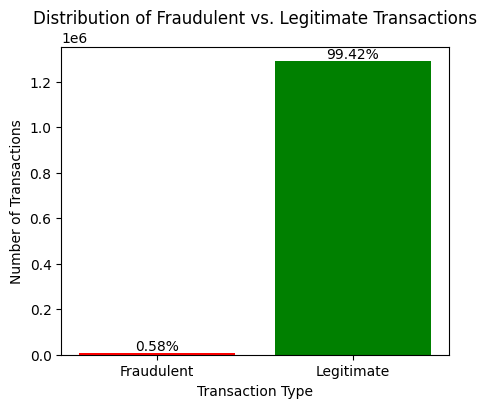

In [7]:
fraud_count=train_data['is_fraud'].sum()
legitimate_count=len(train_data)-fraud_count
total_transactions=len(train_data)
fraud_count_percent=(fraud_count/total_transactions)*100
legitmate_count_percent=(legitimate_count/total_transactions)*100

print("Fraudulent transactions: {} ({:.2f}%)".format(fraud_count, fraud_count_percent))
print("Legitimate transactions: {} ({:.2f}%)".format(legitimate_count, legitmate_count_percent))
plt.figure(figsize=(5,4))
bars=bars = plt.bar(['Fraudulent', 'Legitimate'], [fraud_count, legitimate_count], color=['red', 'green'])
plt.xlabel('Transaction Type')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Fraudulent vs. Legitimate Transactions')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '%.2f%%' % (height / total_transactions * 100), ha='center', va='bottom')

plt.show()

Most common transaction categories:
category
gas_transport    131659
grocery_pos      123638
home             123115
shopping_pos     116672
kids_pets        113035
Name: count, dtype: int64


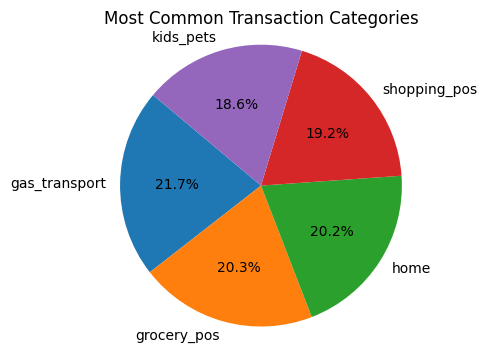

In [8]:
top_categories = train_data['category'].value_counts().head(5)  
print("Most common transaction categories:")
print(top_categories)
plt.figure(figsize=(4,4))
plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', startangle=140)
plt.title('Most Common Transaction Categories')
plt.axis('equal')  #
plt.show()

In [5]:
X=train_data.iloc[:,-2]
Y=train_data.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X.values.reshape(-1,1),Y.values.reshape(-1,1),test_size=0.3,random_state=42)

In [6]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
accuracy=lr.score(X_test,y_test)
accuracy

C:\Users\guvva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9941260093109822

C:\Users\guvva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\guvva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\guvva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    386718
           1       0.00      0.00      0.00      2285

    accuracy                           0.99    389003
   macro avg       0.50      0.50      0.50    389003
weighted avg       0.99      0.99      0.99    389003



<Axes: >

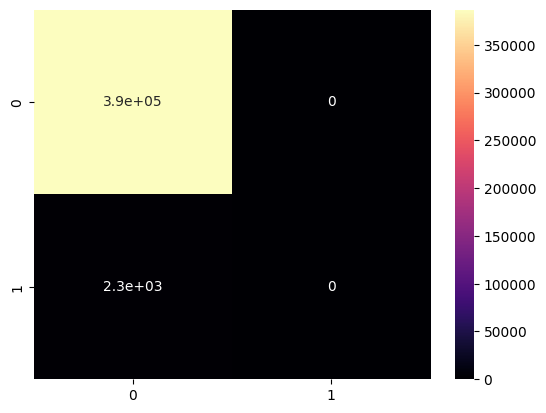

In [7]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
cf=classification_report(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
print(cf)
sns.heatmap(cm,cmap='magma',annot=True)

In [9]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [10]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9889178232558617
Confusion Matrix:
[[384671   2047]
 [  2264     21]]


<Axes: >

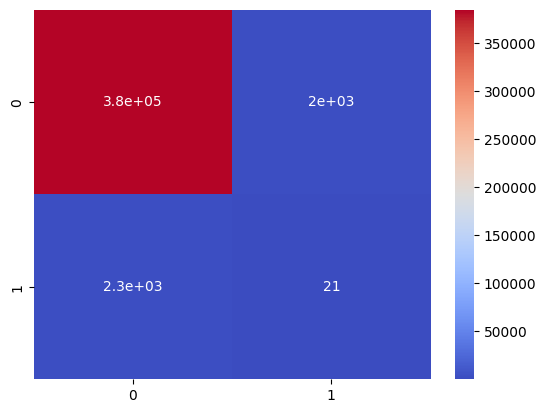

In [12]:
sns.heatmap(conf_matrix,cmap='coolwarm',annot=True)